# SMAI Assignment 6

## Akshat Maheshwari (20161024)

## Question 1

In [2]:
# Import the required libraries
!pip install opencv-python

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from PIL import Image
import cv2
import skimage.data

    100% |████████████████████████████████| 25.8MB 1.3MB/s eta 0:00:01    63% |████████████████████▍           | 16.4MB 11.4MB/s eta 0:00:01


In [3]:
# Gaussian Filter

def gauss_filter(size, sigma):
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/g.sum()

In [4]:
# tanh activation function

def tanh(z):
    return np.tanh(z)

In [5]:
# Sigmoid activation function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
# Softmax Function

def softmax(z):
    e_z = np.exp(z - np.max(z))
    return e_z / np.sum(e_z)

In [7]:
# Convolution of image using a filter

def convolve(img, filt):
    sz = filt.shape[0]
    
    n = img.shape[0]
    m = img.shape[1]
    l = []
    
    for r in range(sz//2, n - sz//2):
        tmp = []
        for c in range(sz//2, m - sz//2):
            cur = img[r-sz//2:r+sz//2+1, c-sz//2:c+sz//2+1]
            tmp.append(np.average(cur * filt))
        l.append(tmp)
    
    l = np.asarray(l)
    
    return l

In [8]:
# Convolution layer function for CNN

def convolution_layer(img, filters):
    res = []
    for it in range(filters.shape[0]):
        cur_filt = filters[it]
        if(len(cur_filt.shape) > 2):
            tmp = convolve(img[0], cur_filt[0])
            for i in range(1, cur_filt.shape[0]):
                tmp += convolve(img[i], cur_filt[i])
        else:
            tmp = convolve(img, cur_filt)
        res.append(tmp)
    res = np.asarray(res)
    return res

In [9]:
# Max Pooling funciton

def max_pooling(feature_map, size, stride):
    if(len(feature_map.shape) == 2):
        n, m = feature_map.shape
        l = []
        for r in range(0, n-size+1, stride):
            tmp = []
            for c in range(0, m-size+1, stride):
                cur = feature_map[r:r+size, c:c+size]
                tmp.append(np.max(cur))
            l.append(tmp)
        l = np.asarray(l)
        return l
    else:
        d, n, m = feature_map.shape
        res = []
        for it in range(d):
            l = []
            for r in range(0, n-size+1, stride):
                tmp = []
                for c in range(0, m-size+1, stride):
                    cur = feature_map[it, r:r+size, c:c+size]
                    tmp.append(np.max(cur))
                l.append(tmp)
            res.append(l)
        res = np.asarray(res)
        return res

Original Image
Original Shape: (340, 494, 3)


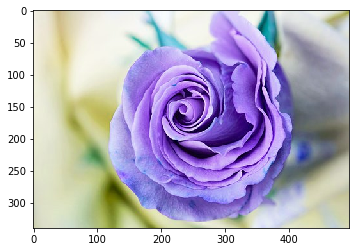

In [10]:
# Load some sample image and print it

image_file = 'Images/image1.jpg'

img = cv2.imread(image_file)

orig = np.asarray(img, dtype=np.uint8)

print("Original Image")
print("Original Shape:",img.shape)
plt.imshow(orig)

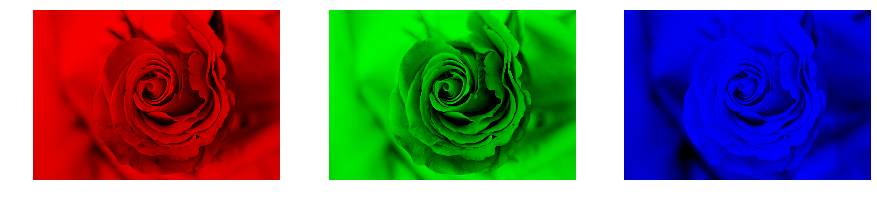

In [11]:
# Display the different channels of the image

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), axs):
    tmp_im = np.zeros(img.shape, dtype="uint8")
    tmp_im[:,:,c] = img[:,:,c]
    ax.imshow(tmp_im)
    ax.set_axis_off()

Resized Image
Resized shape: (340, 494)


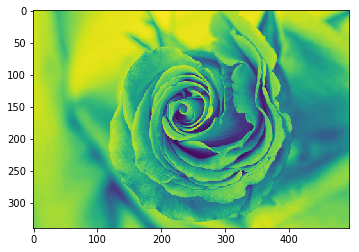

In [13]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# rimg = cv2.resize(img_gray, (32, 32))
rimg = img_gray
rimg = np.asarray(rimg, dtype=np.uint8)

print("Resized Image")
plt.imshow(rimg)
print("Resized shape:",rimg.shape)

### Convolution Layer 1

In [14]:
# Create filters (Gaussian)

# For the first layer, there are 6 filters of dimensions 5 X 5
filters = np.zeros((6, 5, 5))

for i in range(6):
    filters[i, :, :] = gauss_filter(5, i+1)

(6, 336, 490)


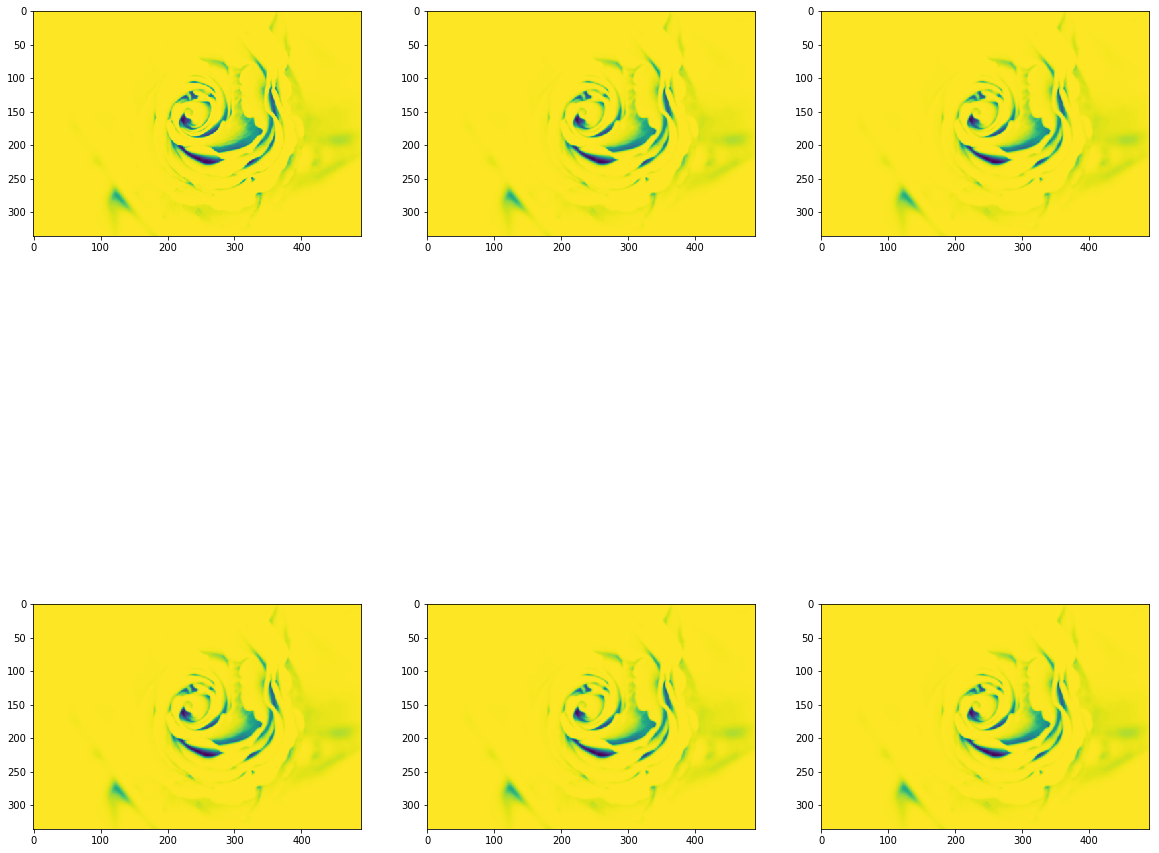

In [15]:
# Execute the current network consisting of one layer

conv1 = convolution_layer(rimg, filters)
conv1 = sigmoid(conv1)

rows = 2
cols = math.ceil(conv1.shape[0]/2)

fig = plt.figure(figsize=(20, 20))

for it in range(1, conv1.shape[0]+1):
    fig.add_subplot(rows, cols, it)
    plt.imshow(conv1[it-1])

print(conv1.shape)

### Pooling Layer 1

(6, 168, 245)


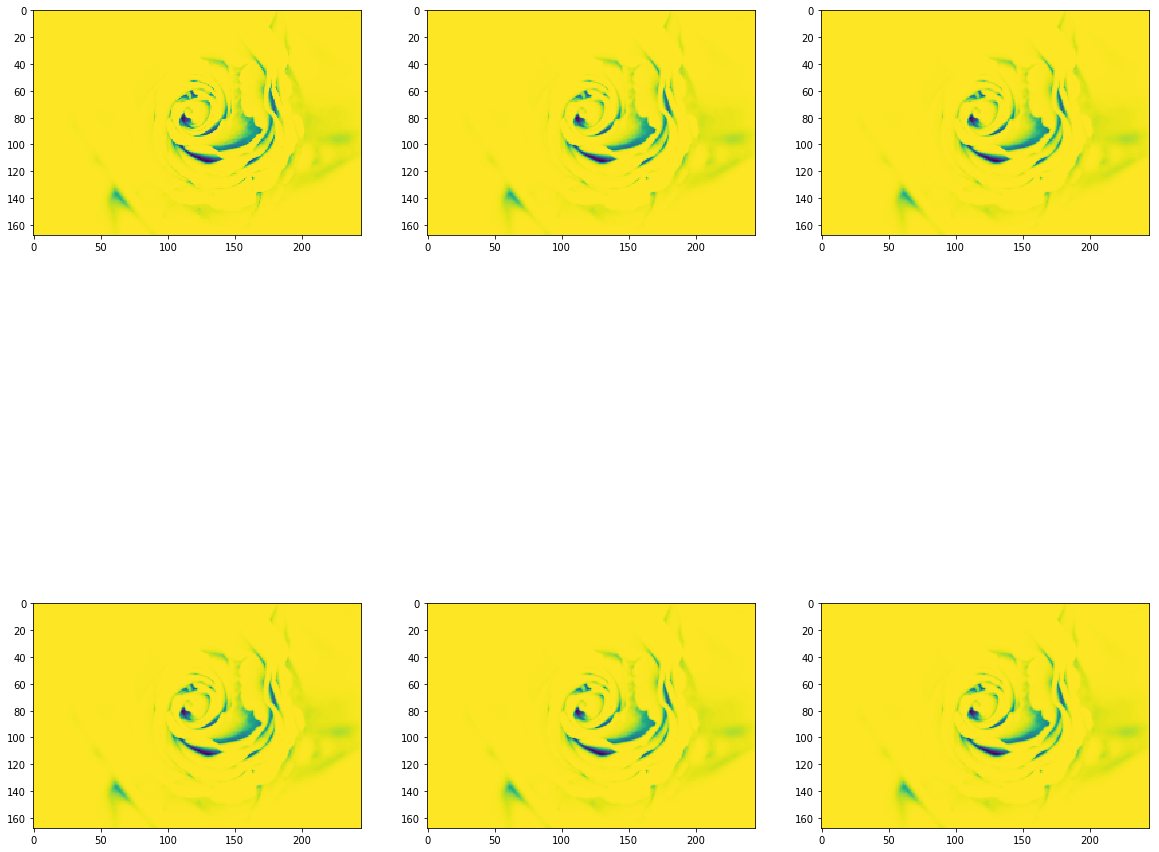

In [16]:
pool1 = max_pooling(conv1, 2, 2)

rows = 2
cols = math.ceil(pool1.shape[0]/2)

fig=plt.figure(figsize=(20, 20))

for it in range(1, pool1.shape[0]+1):
    fig.add_subplot(rows, cols, it)
    plt.imshow(pool1[it-1])

print(pool1.shape)

### Convolution Layer 2

(16, 164, 241)


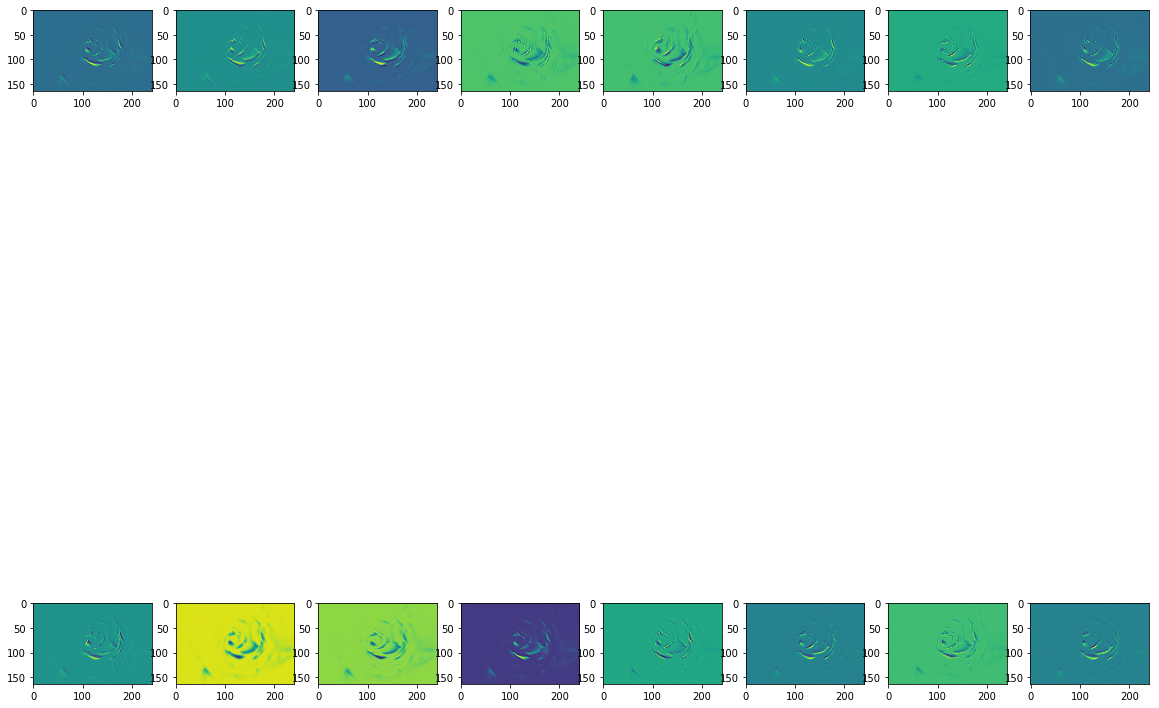

In [17]:
ff = np.random.rand(16, pool1.shape[0], 5, 5) - 0.5

conv2 = convolution_layer(pool1, ff)
conv2 = np.asarray(conv2)

rows = 2
cols = math.ceil(conv2.shape[0]/2)

fig=plt.figure(figsize=(20, 20))

for it in range(1, conv2.shape[0]+1):
    fig.add_subplot(rows, cols, it)
    plt.imshow(conv2[it-1])

print(conv2.shape)

### Pooling Layer 2

(16, 82, 120)


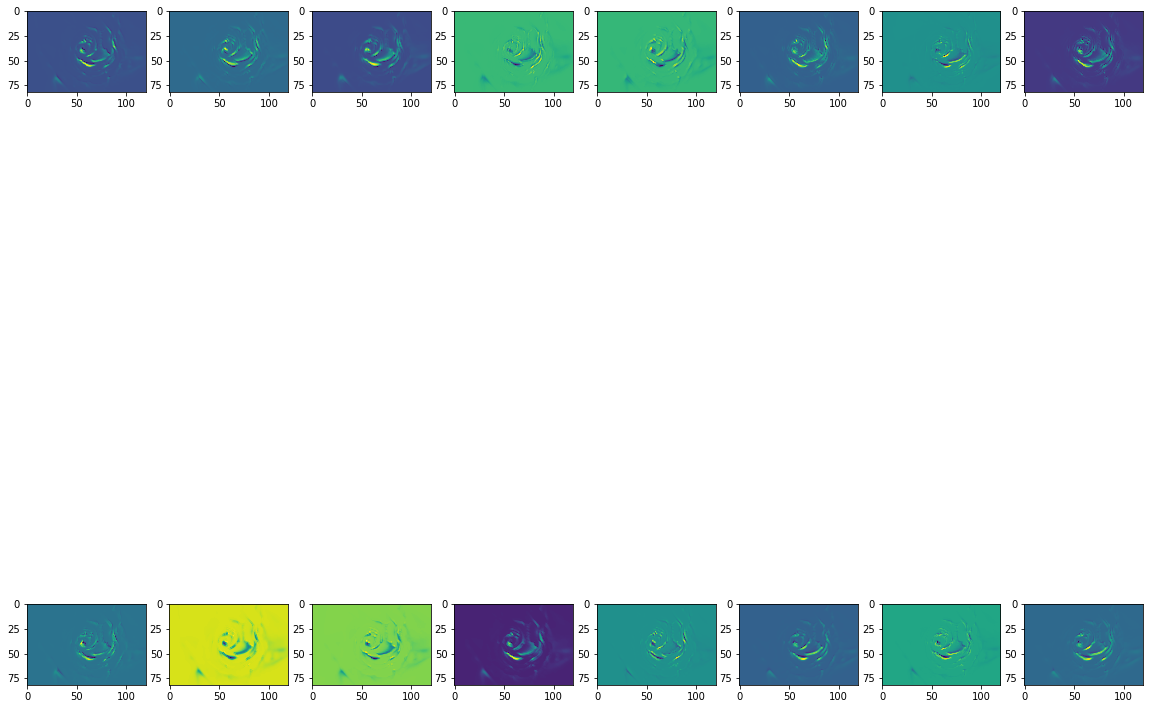

In [18]:
pool2 = max_pooling(conv2, 2, 2)

rows = 2
cols = math.ceil(pool2.shape[0]/2)

fig=plt.figure(figsize=(20, 20))

for it in range(1, pool2.shape[0]+1):
    fig.add_subplot(rows, cols, it)
    plt.imshow(pool2[it-1])

print(pool2.shape)

### Fully Connected Layer 1

(120, 78, 116)


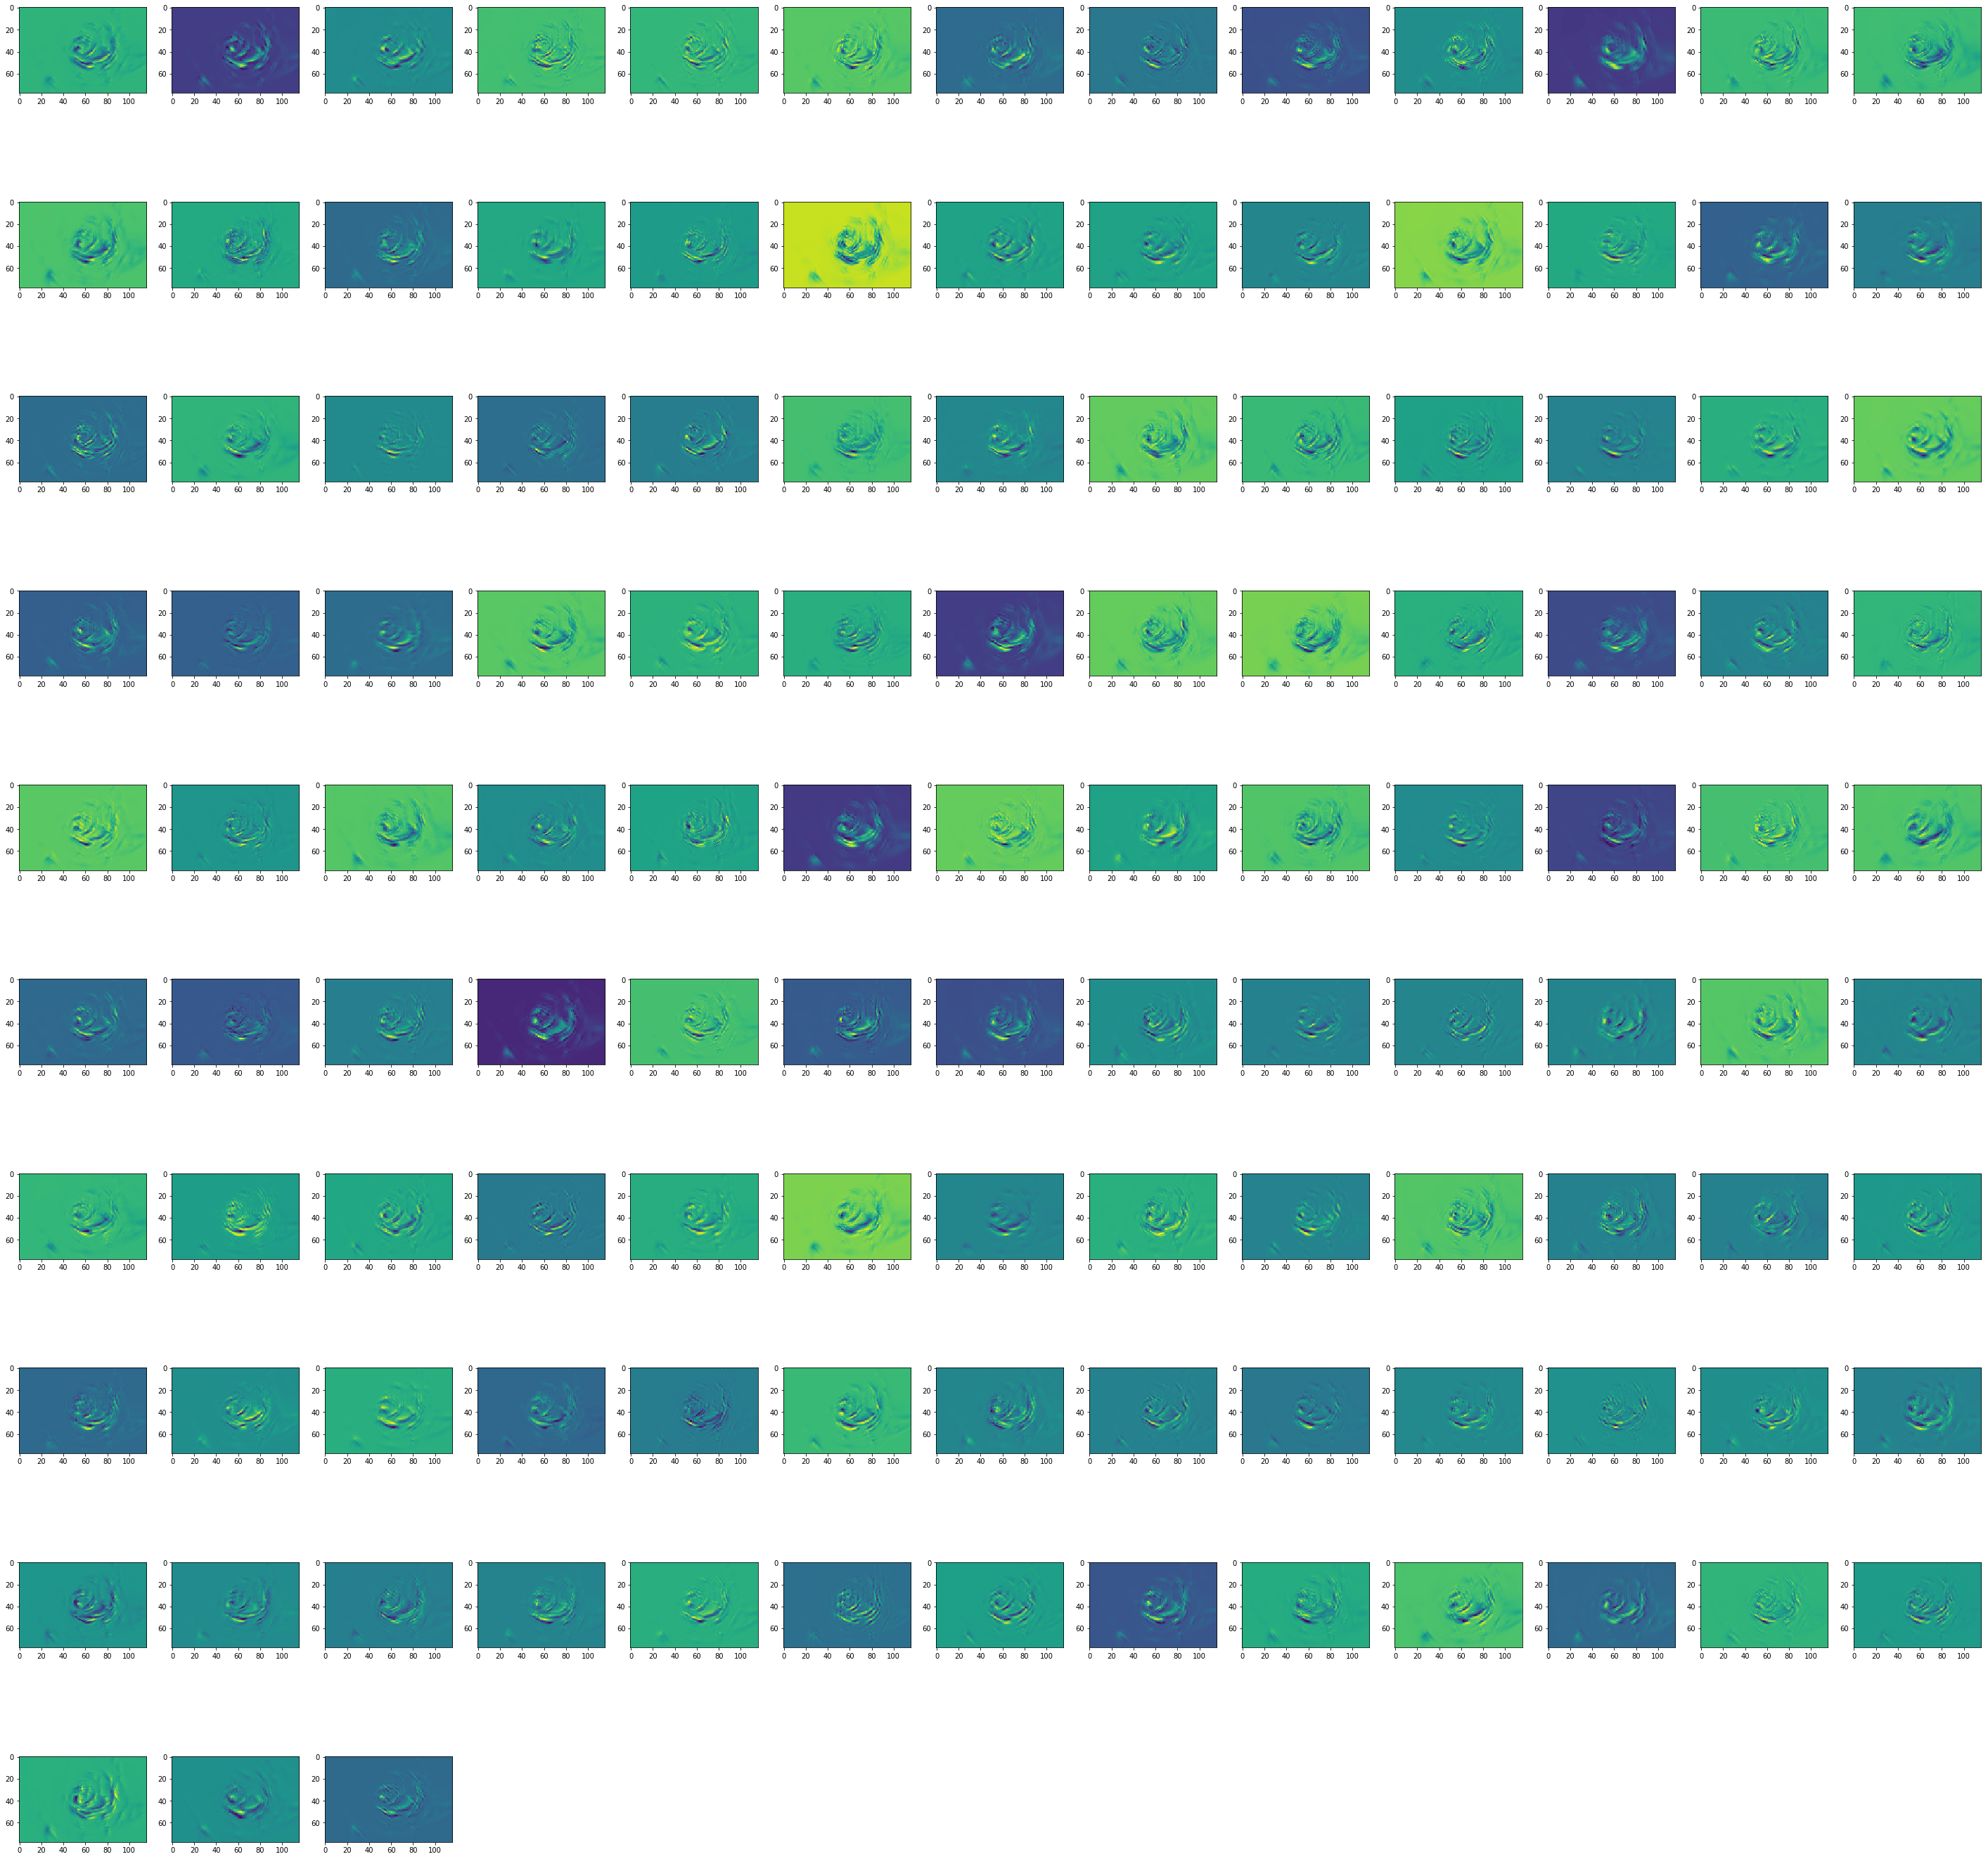

In [19]:
ff = np.random.rand(120, pool2.shape[0], 5, 5) - 0.5

fc1 = convolution_layer(pool2, ff)
fc1 = np.asarray(fc1)

rows = 10
cols = math.ceil(fc1.shape[0]/10 + 1)

fig=plt.figure(figsize=(50, 50))

for it in range(1, fc1.shape[0]+1):
    fig.add_subplot(rows, cols, it)
    plt.imshow(fc1[it-1])

print(fc1.shape)

### Fully Connected Dense Layer 2

In [18]:
fc1 = fc1.reshape((120, 1))
w2 = np.random.rand(84, 120) - 0.5
b2 = np.random.rand(84, 1) - 0.5

fc2 = np.dot(w2, fc1) + b2
fc2 = sigmoid(fc2)
# fc2[fc2<0]=0
print(fc2.shape)
print(fc2)

(84, 1)
[[0.55962563]
 [0.34966707]
 [0.5383796 ]
 [0.62108778]
 [0.63985111]
 [0.44684941]
 [0.58054713]
 [0.39090683]
 [0.58256595]
 [0.59065101]
 [0.51100215]
 [0.61126807]
 [0.49364836]
 [0.38895471]
 [0.55159199]
 [0.49014607]
 [0.57988388]
 [0.47198746]
 [0.50346517]
 [0.43543468]
 [0.5339933 ]
 [0.45292346]
 [0.43980079]
 [0.33472045]
 [0.58292148]
 [0.37433589]
 [0.38665917]
 [0.41957759]
 [0.61407923]
 [0.5411758 ]
 [0.34882153]
 [0.5948453 ]
 [0.59039139]
 [0.61695532]
 [0.50493206]
 [0.58463768]
 [0.47565719]
 [0.53542659]
 [0.46990862]
 [0.56446494]
 [0.59009331]
 [0.49123894]
 [0.60802314]
 [0.56833796]
 [0.46556099]
 [0.49088227]
 [0.39502048]
 [0.56998535]
 [0.39604583]
 [0.53468729]
 [0.45926091]
 [0.435958  ]
 [0.53035955]
 [0.4455461 ]
 [0.42107212]
 [0.43311783]
 [0.5682736 ]
 [0.59716065]
 [0.4139247 ]
 [0.67610843]
 [0.46573937]
 [0.51656432]
 [0.56016347]
 [0.39110521]
 [0.52125559]
 [0.52731938]
 [0.41739985]
 [0.41196828]
 [0.57602834]
 [0.47783146]
 [0.54696983

### Output Softmax Layer

In [19]:
w3 = np.random.rand(10, 84) - 0.5
b3 = np.random.rand(10, 1) - 0.5

out = np.dot(w3, fc2) + b3
out = softmax(out)
print(out)

[[0.02354088]
 [0.04704061]
 [0.1335383 ]
 [0.0449422 ]
 [0.35182845]
 [0.02125856]
 [0.01224515]
 [0.01416688]
 [0.29255445]
 [0.05888452]]


## Question 2

1. Number of parameters in first convolution layer = (n*m*l + 1) * k, where, n=5, m=5, l=1, k=6
    - Hence, total parameters in 1st convolution layer = ```(5*5*1 + 1) * 6 = 156```


2. Number of parameters in pooling operation = 0
    - Pooling operation is done just for dimensionality-reduction. In max pooling opration, the 2X2 neighbourhood is replaced by its maximum value. Thus, no parameters need to be learnt in pooling operation.
    

3. **Fully Connected Layer** contains the most number of parameters.


4. **Convolution Layers** consume the most amount of memory


5. I have tried 2 activation functions: **Sigmoid** and **Tanh**
    - Sigmoid function on convolution gives a better clear image than the tanh function.
    - But, the tanh activation function gave less softmax error than sigmoid function.